### Overview

This JupyTer notebook demonstrates the extraction of metadata from all files of a given directory into a `.csv` file. It then performs analytics on the types of files contained in the directory

In [1]:
from file_processing.directory import Directory

c:\Users\BLUO\Downloads\report\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Defining the directory to analyze

Point to the directory of interest. For absolute paths, format using one of these formats: `r'C:\...\...'` or `'C:\\...\\'` or `'C:/.../...'`

In [2]:
dire = Directory('./tests/resources/')

#### Exploring the CSV report

`dire.generate_report()` accepts the following:

* `report_file` (str): Path to the output csv file
* `include_text` (bool; False): Whether to include text data from the files in the report
* `filters` (dict; None): Inclusion/exclusion criteria
* `keywords` (list; None): A list of keywords to count in the 'text' field of the metadata
* `migrate_filters` (dict; None): Adds a boolean column with 1 if the file satisfies the input criteria, else 0
* `open_files` (bool; True): Whether to open the files to extract file-specific metadata
* `split_metadata` (bool; False): Whether to split the file-specific metadata object such that each field has its own column
* `char_limit` (int; 3000): The cut-off length for each metadata field

Sample filter parameter:

```py
filter = {
    'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__']         # direectories or specific files to EXCLUDE
    'include_str': ['file_processing', 'tests', '__init.py__'],                 # direectories or specific files to INCLUDE
    'extensions': ['.csv', '.docx', '.pptx', '.xlsx', '.pdf'],                  # file extensions to INCLUDE
    'exclude_extensions': ['.tmp', '', '.py'],                                  # file extensions to EXCLUDE
    'min_size': 10000,                                                          # minimum file size (in bytes)
    'max_size': 50000                                                           # maximum file size (in bytes)
}
```

In [3]:
dire.generate_report(report_file='./tests/resources/sample_reports/report.csv', 
                    split_metadata=True, 
                    filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']},
                    migrate_filters={'extensions': ['.csv', '.docx', '.pdf', '.pptx']},
                    include_text=True,
                    keywords=['Health', 'Canada', 'Classified', 'Protected'])

Processing files:  72%|███████▏  | 99/138 [00:49<00:02, 14.00file/s]invalid pdf header: b'U\x85[\x9c\xc0'
EOF marker not found
Processing files: 100%|██████████| 138/138 [00:49<00:00,  2.78file/s]


#### Filtering out the data of interest

In [4]:
import pandas as pd

analytics = dire.generate_analytics(report_file='./tests/resources/sample_reports/analytics.csv', 
                                   filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']})
df = pd.DataFrame.from_dict((analytics))
df

Processing files: 100%|██████████| 138/138 [00:01<00:00, 136.71file/s]


,size (MB),count
.abcd,0.000020,1
.aiff,51.142728,1
.csv,17.975577,9
.docx,0.097953,6
.flac,12.938126,1
.gif,4.332710,6
.heic,0.224590,2
.heif,0.224590,2
.html,0.503157,3
.jpeg,0.008800,1


#### Visualizing the filtered data

Text(0.5, 1.0, 'File types by Count and Size (mb)')

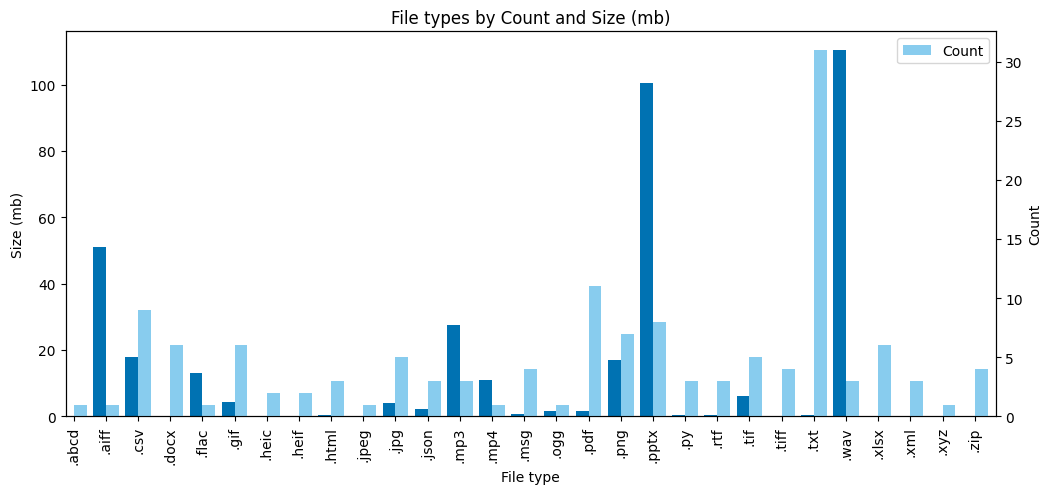

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax2.yaxis.get_major_locator().set_params(integer=True)

width = 0.4

(df['size (MB)']).plot(kind='bar', color='#0072b2', ax=ax, width=width, position=1, label='Size (mb)')
df['count'].plot(kind='bar', color='#88ccee', ax=ax2, width=width, position=0, label='Count')

ax.set_ylabel('Size (mb)')
ax2.set_ylabel('Count')
ax.set_xlabel('File type')

plt.legend()
plt.title('File types by Count and Size (mb)')


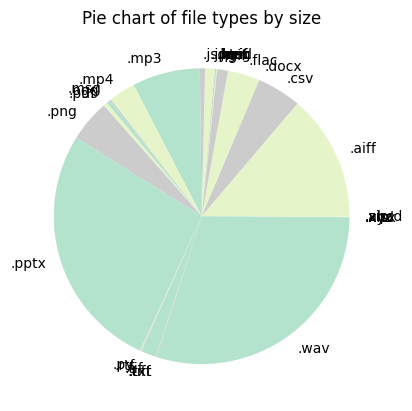

In [6]:
import numpy as np

labels = df.index
sizes = df['size (MB)']

cmap = plt.get_cmap("Pastel2")

plt.title('Pie chart of file types by size')
plt.pie(sizes, labels=labels, colors=cmap(np.arange(3)*4))
plt.show()

#### Identifying similar files

The below example uses **cosine** similarity (`threshold=0`) and returns a grid comparing every file against each other

In [7]:
dire = Directory('./tests/resources/similarity_test_files/')
dire.identify_duplicates(report_file='./tests/resources/sample_reports/similarity_cosine.csv',
                        threshold=0)

Processing files: 100%|██████████| 20/20 [00:00<00:00, 55.27file/s]
c:\Users\BLUO\Downloads\report\.venv\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Alternatively, it is possible to use **FAISS** indexes by specifying a threshold

In [8]:
dire.identify_duplicates(report_file='./tests/resources/sample_reports/similarity_faiss.csv',
                        threshold=0.2,
                        top_n=4,
                        use_abs_path=False)

Processing files: 100%|██████████| 20/20 [00:00<00:00, 50.24file/s]
